##  Moebius transformation applied to a discrete image ##

 The aim of this notebook is to illustrate how a Moebius transformation, defined by its action on three points, distorts a  discrete image.
A Mobius transformation is defined as a geometric transformation of that image, using the function
`geometric_transform` from `scipy.ndimage`.

In image processing, a geometric transformation of an image consists in modifying
the positions of pixels in an image, but keeping
their colors unchanged.

In order to define a geometric transformation, as it is implemented in `scipy.ndimage`, we fix some background for mathematically oriented people,  for which the only summary description in scipy documentation can be incomprehensible, as it was for me, too.

An image of resolution $m\times n$ is interpreted as a mapping
$$img:\{0,1, \ldots, m-1\}\times \{0,1, \ldots, n-1\}\to\mathbb{R}^3 (\mathbb{R}^4),$$
defined by $img(k,l)=(r,g,b)$ or (r, g, b, a), i.e. to the pixel in the row k, column l, one 
associates its color code (r, g, b) or (r, g, b, a).  
    
The pixel position is also given by the point of coordinates $(x=l, y=k)$,
defined with respect     to the system of orthogonal axes $Oxy$, where $O$ is the left-upper corner of the image, $Ox$ points horizontally to the right,  and $Oy$ downwards.

Denoting by $D$ the grid of points associated to our image, as above,
a geometric transformation of that image is an invertible map $T:D\to D'\subset \mathbb{R}^2$. The transformation $T$ is chosen such that if $\Delta$ is the continuous rectangular region representing  the image, to have  $T(\Delta)\cap \Delta \neq \emptyset$.
    

 The geometric transformation implemented in `scipy.ndimage`  works as follows: theoretically for each point P in the output image, i.e. an image of the same resolution as  the input image, img,   one calculates $T^{-1}(P)$. If $T^{-1}(P)$ is a point in img,  one assigns to P the color of $T^{-1}(P)$. If is is outside the img (when img is interpreted as a continuous rectangular region) it is filled by a prescribed method. 
 
 By `scipy` documentation, `scipy.ndimage` takes as output image  the original image and one works in place, for each pixel. The color of pixels in img  that are not exactly preimages by $T^{-1}$ of some points $P$ is computed via a spline  interpolation of prescribed order.

The Python function that implements $T^{-1}$, let us call it `inverse_map`,  has as parameter a tuple of length equal to the output array (image) rank, and returns  a tuple of length equal to the input array (image) rank (recall that the rank of a `ndarray` is the length of its shape).

The `scipy.ndimage.geometric_transform` that applies the transformation $T$  to an image, `img`, is defined as follows:

`geometric_transform(img, inverse_mapping, output_shape=None,  output=None, order=3, mode='constant',
                     cval=0.0, prefilter=True, extra_arguments=(),extra_keywords={})`    

- `order` sets the order of the spline interpolation;
- `mode` is a key that sets the method of filling the points P, for which $T^{-1}(P)$ is not in img.
   The options are: 'constant' (all such points are colored with the same color), 'nearest', 'reflect' or 'wrap';
   default is 'constant'.
- `cval` has effect when mode='constant'. It gives the  grey color code, between 0 and 255 (for jpg images), to fill the regions consisting in points that are not mapped by $T^{-1}$ in img.

Next we show how to apply a Moebius transform, $T(z)=(az+b)/(cz+d)$, $ad-bc\neq0$, to a color image.
The inverse map is defined by  $T^{-1}(z)=(dz-b)/(-cz+a)$.

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import geometric_transform

Our image has the shape $(m, n, 3)$. Hence the `inverse_map` has as parameter a tuple of len(3).

In [28]:
def inv_Moebius_transform(index): 
    global a, b, c, d
    z = index[1] + 1j*index[0] # index[0] gives the row in output image, index[1] the column, and index[2]
                               # the color 
    w = (d*z-b)/(-c*z+a) 
    return np.imag(w), np.real(w), index[2] # returns the coordinates of a point in img and its color 


In [29]:
plt.rcParams['figure.figsize'] = (8,6)

Read the image, img:

image shape (512L, 512L, 3L)


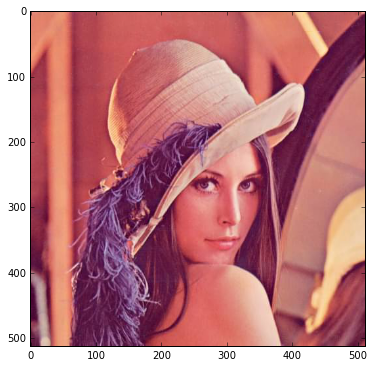

In [30]:
img=plt.imread('Data/lenajpg.jpg')
plt.imshow(img)
print 'image shape', img.shape

Define the Moebius transformation that maps three points  zp[i] to wp[i], i=0,1,2:

In [31]:
z1=300+1j*230
w1=np.exp(1j*np.pi/11)*z1  #w1 is obtained from z1 through a rotation of $\pi/11$, counter-clockwise
zp=[z1, 20+250*1j, 400+1j*180 ]
wp=[w1, 20+250*1j, 400+1j* 210]

The coefficients, a, b, c, d, of the corresponding Moebius transformation are computed as
[follows](https://en.wikipedia.org/wiki/M%C3%B6bius_transformation#Specifying_a_transformation_by_three_points):

In [32]:
a = np.linalg.det([[zp[0]*wp[0], wp[0], 1], 
                   [zp[1]*wp[1], wp[1], 1], 
                   [zp[2]*wp[2], wp[2], 1]])

b = np.linalg.det([[zp[0]*wp[0], zp[0], wp[0]], 
                   [zp[1]*wp[1], zp[1], wp[1]], 
                   [zp[2]*wp[2], zp[2], wp[2]]])         

c = np.linalg.det([[zp[0], wp[0], 1], 
                   [zp[1], wp[1], 1], 
                   [zp[2], wp[2], 1]])

d = np.linalg.det([[zp[0]*wp[0], zp[0], 1], 
                   [zp[1]*wp[1], zp[1], 1], 
                   [zp[2]*wp[2], zp[2], 1]])

Apply this transformation to the Lena's image:

In [46]:
newimg = geometric_transform(img, inv_Moebius_transform,  cval=240) #set color  for the points P, mapped by
                                                                    #T^{-1} outside the img

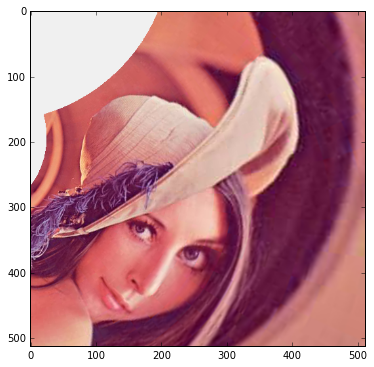

In [47]:
plt.imshow(newimg)

Now let us apply the inverse, $T^{-1}$, to our image. Its inverse is just $T$:

In [35]:
def inverse_map(index): 
    global a, b, c, d
    z = index[1] + 1j*index[0] 
    w = (a*z+b)/(c*z+d) 
    return np.imag(w), np.real(w), index[2] 

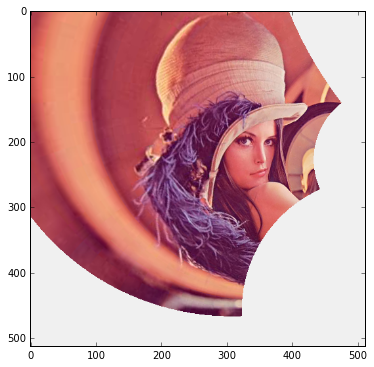

In [48]:
nnewimg = geometric_transform(img, inverse_map, cval=240) 
plt.imshow(nnewimg)


For comparison we plot again all three images:

In [49]:
images=[img, newimg, nnewimg]

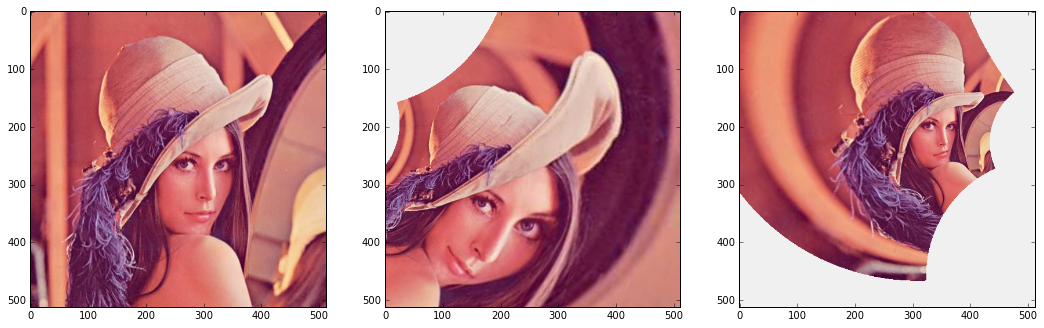

In [50]:
fig = plt.figure(figsize=(18,8))
sbplot = 130
for k in range(3):
    sbplot+=1
    ax = fig.add_subplot(sbplot)
    im=ax.imshow(images[k])   

In [51]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()